In [87]:
#Wisconsin breast cancer data analysis
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

from sklearn.decomposition import PCA
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

bc_data = load_breast_cancer()
#cancer = pd.DataFrame(bc_data.data, columns=bc_data.feature_names)
X = pd.DataFrame(bc_data.data, columns=bc_data.feature_names)
#print(cancer.head())
#labels = pd.DataFrame(bc_data.target)
y = pd.DataFrame(bc_data.target)
y = y.iloc[:,0]

#print(labels.tail())
print()
print("Data information")
print("Design matrix ", X.shape)
print("Targets", y.shape)

#yy = bc_data.target
#print(yy)
#print("shape of y is ", yy.shape)
#labels = pd.DataFrame(bc_data.target)
#y.iloc[:88]


Data information
Design matrix  (569, 30)
Targets (569,)


Shape of the correlation matrix:  (30, 30)


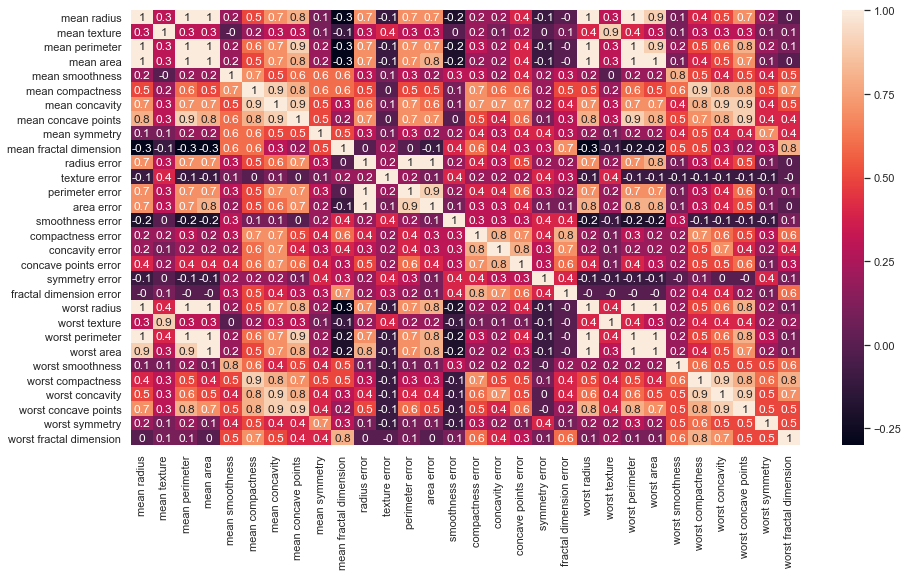

In [290]:
#Correlation matrix

correlation_matrix = X.corr().round(1)
print("Shape of the correlation matrix: ",correlation_matrix.shape)

plt.figure(figsize=(15,8))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

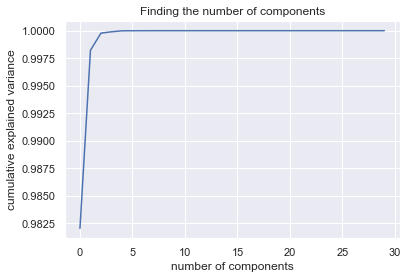

In [89]:
#pca analysis
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Finding the number of components")
plt.show()


In [90]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

#now scale the data
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print()
print("Data information ")
print("Training data")
print("X train ", X_train.shape)
print("y train ", y_train.shape)
print("Testing data")
print("X test", X_test.shape)
print("y test", y_test.shape)


Data information 
Training data
X train  (455, 30)
y train  (455,)
Testing data
X test (114, 30)
y test (114,)


In [187]:
#print(confusion_matrix(y_test, y_pred_dectree))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_dectree).ravel()
#print()
#print("TN =", tn)
#print("FP =", fp)
#print("FN =", fn)
#print("TP =", tp)

In [189]:
from sklearn.linear_model import SGDClassifier
sgd_class = SGDClassifier(random_state=22)
sgd_class.fit(X_train, y_train)
s1 = sgd_class.score(X_train, y_train)
s2 = sgd_class.score(X_test, y_test)

print("SGD classifier")
print("Training set accuracy :", s1 )
print("Test set accuracy     :", s2 )

SGD classifier
Training set accuracy : 0.9824175824175824
Test set accuracy     : 0.9385964912280702


Logistic reggession
Training set accuracy : 0.989010989010989
Test set accuracy     : 0.9649122807017544
Training set accuracy with PCA data: 0.978021978021978


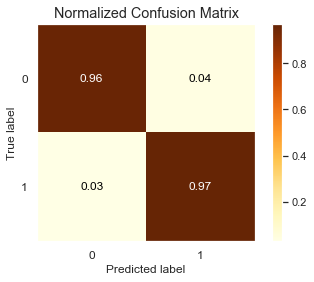

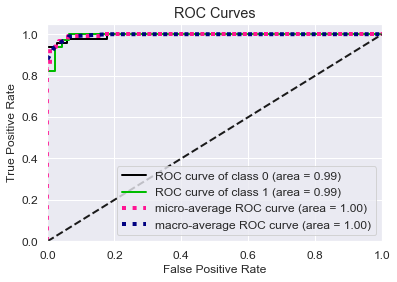

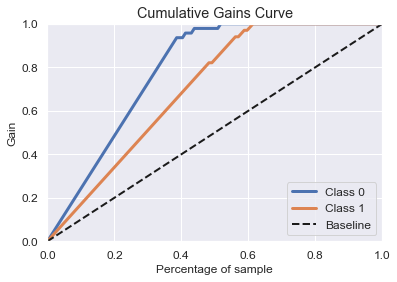

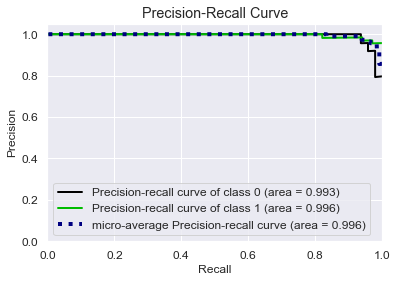

In [190]:
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
# Logistic Regression

logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)
s1 = logreg.score(X_train, y_train)
s2 = logreg.score(X_test, y_test)

print("Logistic reggession")
print("Training set accuracy :", s1 )
print("Test set accuracy     :", s2 )

#using only the principle components
pca = PCA(n_components = 5)
PC_train = pca.fit_transform(X_train)
logpca = LogisticRegression(solver='lbfgs')
logpca.fit(PC_train, y_train)
print("Training set accuracy with PCA data:", logpca.score(PC_train, y_train))

y_pred_log_reg = logreg.predict(X_test)
y_probas_log_reg = logreg.predict_proba(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred_log_reg, normalize=True, cmap='YlOrBr')
plt.show()
skplt.metrics.plot_roc(y_test, y_probas_log_reg)
plt.show()
skplt.metrics.plot_cumulative_gain(y_test, y_probas_log_reg)
plt.show()
skplt.metrics.plot_precision_recall(y_test, y_probas_log_reg)
plt.show()

Decision tree
Training set accuracy  0.9714285714285714
Test set accuracy  0.9649122807017544


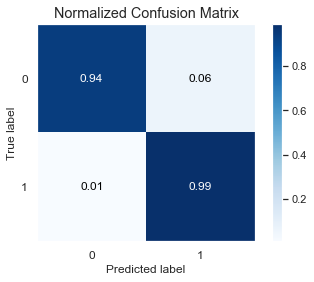

In [205]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

#dec_tree = DecisionTreeClassifier(max_depth=None, criterion='entropy',random_state=0)
dec_tree = DecisionTreeClassifier(max_depth=3,random_state=0)
dec_tree.fit(X_train, y_train)
print("Decision tree")
print("Training set accuracy ", dec_tree.score(X_train, y_train))
print("Test set accuracy ", dec_tree.score(X_test, y_test))
y_pred_dectree = dec_tree.predict(X_test)
y_probas_dectree = dec_tree.predict_proba(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred_dectree, normalize=True)
plt.show()

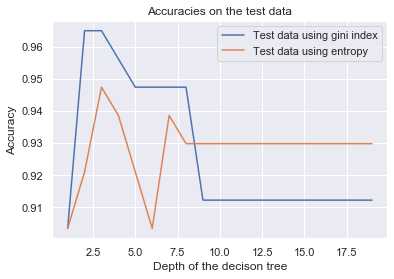

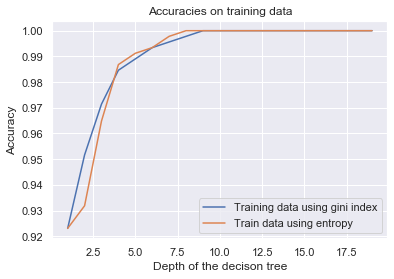

In [204]:
#we want to find the optimum depth of tree
depth1 = np.arange(1, 20)
acctest1 = []
acctrain1 = []
acctest12 = []
acctrain12 = []

for d in depth1:
    dec_tree = DecisionTreeClassifier(max_depth=d, random_state=0)
    dec_tree.fit(X_train, y_train)
    acctest1.append(dec_tree.score(X_test, y_test))
    acctrain1.append(dec_tree.score(X_train, y_train))
    dec_treet = DecisionTreeClassifier(max_depth=d,criterion='entropy',random_state=0)
    dec_treet.fit(X_train, y_train)
    acctest12.append(dec_treet.score(X_test, y_test))
    acctrain12.append(dec_treet.score(X_train, y_train))

plt.figure()
plt.plot(depth1, acctest1, label="Test data using gini index")
#plt.plot(depth1, acctrain1, label="Train data with gini")
plt.plot(depth1, acctest12, label="Test data using entropy")
#plt.plot(depth1, acctrain12, label="Train data with entropy")
plt.xlabel("Depth of the decison tree")
plt.ylabel("Accuracy")
plt.title("Accuracies on the test data")
plt.legend()
plt.show()

plt.figure()
#plt.plot(depth1, acctest1, label="Test data with gini")
plt.plot(depth1, acctrain1, label="Training data using gini index")
#plt.plot(depth1, acctest12, label="Test data with entropy")
plt.plot(depth1, acctrain12, label="Train data using entropy")
plt.xlabel("Depth of the decison tree")
plt.ylabel("Accuracy")
plt.title("Accuracies on training data")
plt.legend()
plt.show()

In [212]:
dec_tree = DecisionTreeClassifier(min_samples_leaf=12, random_state=0)
dec_tree.fit(X_train, y_train)
print("Decision tree")
print("Training set accuracy ", dec_tree.score(X_train, y_train))
print("Test set accuracy ", dec_tree.score(X_test, y_test))
y_pred_dectree = dec_tree.predict(X_test)
y_probas_dectree = dec_tree.predict_proba(X_test)

Decision tree
Training set accuracy  0.9516483516483516
Test set accuracy  0.9649122807017544


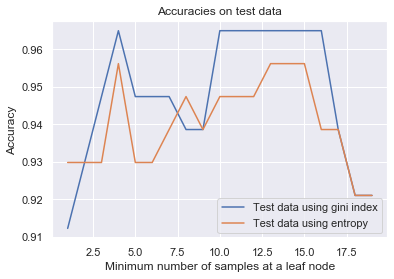

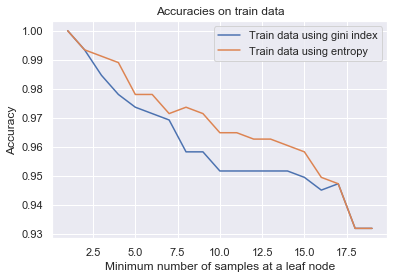

In [222]:
#want to find the minimum sample leaves 
leaf = np.arange(1, 20)
acctest2 = []
acctrain2 = []
acctest22 = []
acctrain22 = []

for l in leaf:
    dec_tree = DecisionTreeClassifier(min_samples_leaf=l,random_state=0)
    dec_tree.fit(X_train, y_train)
    acctest2.append(dec_tree.score(X_test, y_test))
    acctrain2.append(dec_tree.score(X_train, y_train))
    dec_treett = DecisionTreeClassifier(min_samples_leaf=l,criterion='entropy', random_state=0)
    dec_treett.fit(X_train, y_train)
    acctest22.append(dec_treett.score(X_test, y_test))
    acctrain22.append(dec_treett.score(X_train, y_train))

plt.figure()
plt.plot(leaf, acctest2, label="Test data using gini index")
plt.plot(leaf, acctest22, label="Test data using entropy")
plt.xlabel("Minimum number of samples at a leaf node")
plt.ylabel("Accuracy")
plt.title("Accuracies on test data")
plt.legend()

plt.figure()
plt.plot(leaf, acctrain2, label="Train data using gini index")
plt.plot(leaf, acctrain22, label="Train data using entropy")
plt.xlabel("Minimum number of samples at a leaf node")
plt.ylabel("Accuracy")
plt.title("Accuracies on train data")
plt.legend()
plt.show()


Training set accuracy  0.9714285714285714
Test set accuracy  0.9649122807017544


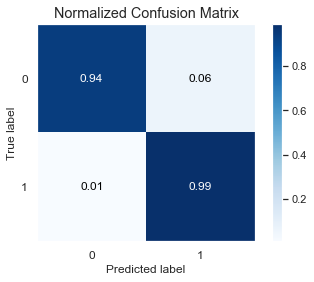

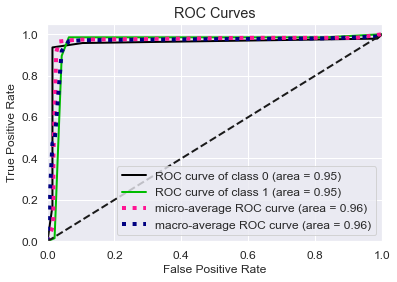

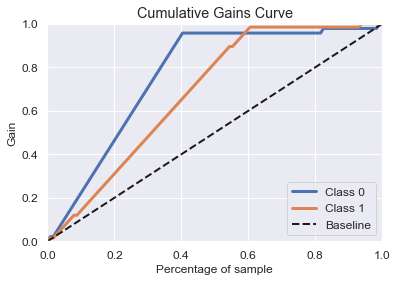

In [295]:
#The best accuracy occurs when max depth is 3 with gini index, and now I will plot the 
#accuracy measures
dec_tree = DecisionTreeClassifier(max_depth=3, random_state=0)
dec_tree.fit(X_train, y_train)
print("Training set accuracy ", dec_tree.score(X_train, y_train))
print("Test set accuracy ", dec_tree.score(X_test, y_test))

y_preddectree = dec_tree.predict(X_test)
y_probasdectree = dec_tree.predict_proba(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_preddectree, normalize=True)
plt.show()
skplt.metrics.plot_roc(y_test, y_probasdectree)
plt.show()
skplt.metrics.plot_cumulative_gain(y_test, y_probasdectree)
plt.show()

In [232]:
from sklearn.svm import SVC
#Support vector machine

svm1 = SVC(gamma='auto', C=0.2)
svm1.fit(X_train, y_train)
print("Training set accuracy ", svm1.score(X_train, y_train))
print("Test set accuracy ", svm1.score(X_test, y_test))

Training set accuracy  0.9626373626373627
Test set accuracy  0.9649122807017544


In [242]:
#Using a voting classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score


log_clf = LogisticRegression(solver="liblinear", random_state=0)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=0)
svm_clf = SVC(gamma="auto", C=0.2, random_state=0)
sgd_clf = SGDClassifier(random_state=0)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf), ('sgd', sgd_clf)],
    voting='hard')

voting_clf.fit(X_train, y_train)

print("Hard classifier")
print("----------------")
for classf in (log_clf, rnd_clf, svm_clf, sgd_clf, voting_clf):
    classf.fit(X_train, y_train)
    y_pred = classf.predict(X_test)
    print(classf.__class__.__name__, accuracy_score(y_test, y_pred))
print()

log_clf = LogisticRegression(solver="liblinear", random_state=0)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=0)
svm_clf = SVC(gamma="auto",C=0.2, probability=True, random_state=0)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

print("Soft classifier")
print("----------------")
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


Hard classifier
----------------
LogisticRegression 0.9649122807017544
RandomForestClassifier 0.9649122807017544
SVC 0.9649122807017544
SGDClassifier 0.9473684210526315
VotingClassifier 0.9649122807017544

Soft classifier
----------------
LogisticRegression 0.9649122807017544
RandomForestClassifier 0.9649122807017544
SVC 0.9649122807017544
VotingClassifier 0.9649122807017544


Training set accuracy  1.0
Test set accuracy  0.9736842105263158


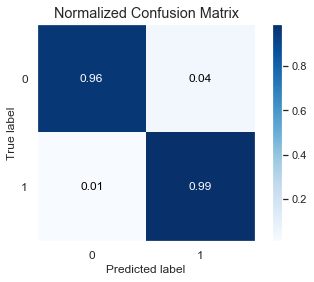

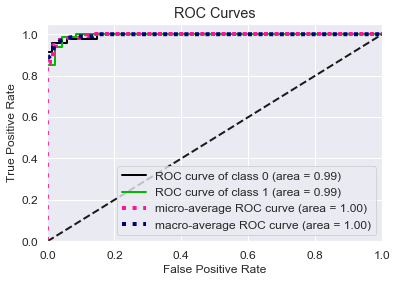

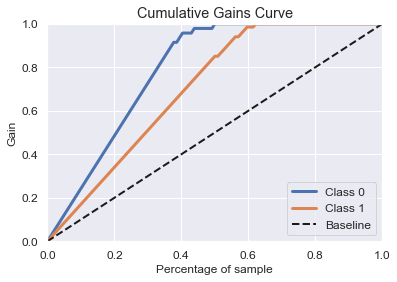

In [291]:
#bagging method
from sklearn.ensemble import BaggingClassifier
#max_samples=10

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=12), n_estimators=253,
    bootstrap=True, n_jobs=-1, random_state=12)

bag_clf.fit(X_train, y_train)

print("Training set accuracy ", bag_clf.score(X_train, y_train))
print("Test set accuracy ", bag_clf.score(X_test, y_test))

y_predbag = bag_clf.predict(X_test)
y_probbag = bag_clf.predict_proba(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_predbag, normalize=True)
plt.show()
skplt.metrics.plot_roc(y_test, y_probbag)
plt.show()
skplt.metrics.plot_cumulative_gain(y_test, y_probbag)
plt.show()

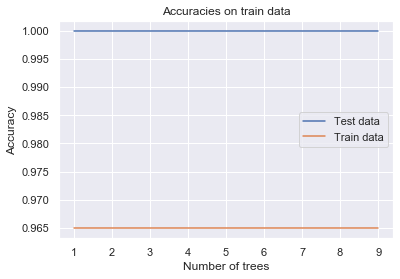

In [292]:
#accuracy vs number of estimators
ntrees = np.arange(1,10)
accntest = []
accntrain = []

for t in ntrees:
    bag_clf = BaggingClassifier(
        DecisionTreeClassifier(random_state=12), n_estimators=100,
        bootstrap=True, n_jobs=-1, random_state=12)

    bag_clf.fit(X_train, y_train)
    accntest.append(bag_clf.score(X_train, y_train))
    accntrain.append(bag_clf.score(X_test, y_test))

plt.figure()
plt.plot(ntrees, accntest, label="Test data")
plt.plot(ntrees, accntrain, label="Train data")
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.title("Accuracies on train data")
plt.legend()
plt.show()
#print(accuracy_score(y_test, y_pred))

In [154]:
#REPITION OF PREVIOUS ONE ?? IGNORE FOR NOW

log_clf = LogisticRegression(solver="liblinear", random_state=0)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=0)
svm_clf = SVC(gamma="auto", random_state=0)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

voting_clf.fit(X_train, y_train)

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

log_clf = LogisticRegression(solver="liblinear", random_state=0)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=0)
svm_clf = SVC(gamma="auto", probability=True, random_state=0)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)


for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9649122807017544
RandomForestClassifier 0.9649122807017544
SVC 0.9824561403508771
VotingClassifier 0.9736842105263158
LogisticRegression 0.9649122807017544
RandomForestClassifier 0.9649122807017544
SVC 0.9824561403508771
VotingClassifier 0.9649122807017544


Training set accuracy  1.0
Test set accuracy  0.9824561403508771


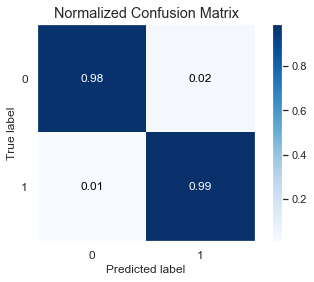

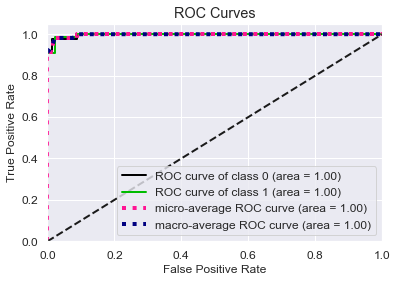

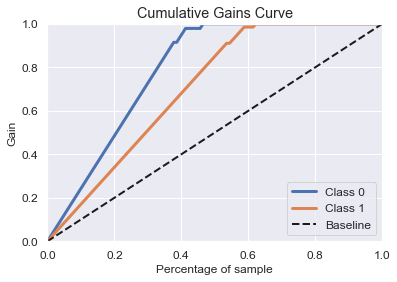

In [289]:
#Random forest

#random_ff = RandomForestClassifier(n_estimators=100,criterion="entropy")
random_ff = RandomForestClassifier(n_estimators=253, random_state=0)
random_ff.fit(X_train, y_train)

print("Training set accuracy ", random_ff.score(X_train, y_train))
print("Test set accuracy ", random_ff.score(X_test, y_test))
y_predrf = random_ff.predict(X_test)
y_probasrf = random_ff.predict_proba(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_predrf, normalize=True)
plt.show()
skplt.metrics.plot_roc(y_test, y_probasrf)
plt.show()
skplt.metrics.plot_cumulative_gain(y_test, y_probasrf)
plt.show()

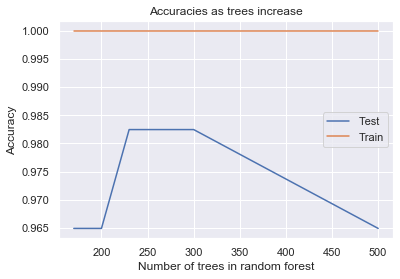

In [288]:
numbertrees = [170,200,230,240,250,280,300,500]
accrtest = []
accrtrain =[]

for q in numbertrees:
    random_ff = RandomForestClassifier(n_estimators=q, random_state=0)
    random_ff.fit(X_train, y_train)
    accrtest.append(random_ff.score(X_test, y_test))
    accrtrain.append(random_ff.score(X_train, y_train))
    
plt.plot(numbertrees,accrtest, label="Test")
plt.plot(numbertrees,accrtrain, label="Train")
plt.xlabel("Number of trees in random forest")
plt.ylabel("Accuracy")
plt.title("Accuracies as trees increase")
plt.legend()
plt.show()